In [15]:
import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import random_split, DataLoader

In [16]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 16

trainset = torchvision.datasets.CIFAR10(root='../../data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='../../data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


# Train/Validation Split
train_size = int(0.8 * len(trainset))
val_size = len(trainset) - train_size
train_dataset, val_dataset = random_split(trainset, [train_size, val_size])

trainloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
valloader = DataLoader(val_dataset, batch_size=batch_size, shuffle=True)

print('Train size:', len(train_dataset))
print('Validation size:', len(val_dataset))
print('Test size:', len(testset))

Files already downloaded and verified
Files already downloaded and verified
Train size: 40000
Validation size: 10000
Test size: 10000


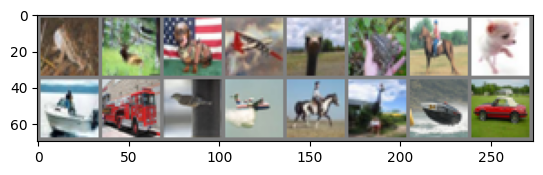

frog  deer  dog   plane bird  frog  horse dog   ship  truck bird  plane horse bird  ship  car  


In [17]:
import matplotlib.pyplot as plt
import numpy as np

# 이미지를 보여주기 위한 함수

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# 학습용 이미지를 무작위로 가져오기
dataiter = iter(trainloader)
images, labels = next(dataiter)

# 이미지 보여주기
imshow(torchvision.utils.make_grid(images))
# 정답(label) 출력
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

In [18]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # 배치를 제외한 모든 차원을 평탄화(flatten)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

In [19]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

In [20]:
import torch
import os

# 최고 성능을 추적할 변수 초기화
best_val_accuracy = 0.0  # 최고 검증 정확도 초기값
best_model_path = "best_model.pth"  # 저장할 경로

# 학습 및 검증 루프
for epoch in range(15):  # 데이터셋을 15번 반복
    net.train()
    running_loss = 0.0

    for i, data in enumerate(trainloader, 0):
        inputs, labels = data

        # 변화도 초기화
        optimizer.zero_grad()

        # 순전파, 손실 계산, 역전파, 최적화
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # 학습 손실 계산
        running_loss += loss.item()

    # 검증 단계
    net.eval()
    val_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for data in valloader:
            inputs, labels = data
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()

            # 정확도 계산
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    val_loss /= len(valloader)
    accuracy = 100 * correct / total

    # 에포크 결과 출력
    print(f"Epoch {epoch + 1}, Training Loss: {running_loss / len(trainloader):.3f}, Validation Loss: {val_loss:.3f}, Validation Accuracy: {accuracy:.2f}%")

    # 검증 정확도가 최고 기록을 갱신하면 모델 저장
    if accuracy > best_val_accuracy:
        best_val_accuracy = accuracy
        torch.save(net.state_dict(), best_model_path) # 모델 저장
        print(f"Best model updated at Epoch {epoch + 1}, Accuracy: {best_val_accuracy:.2f}%")

print('Finished Training')

# 저장된 모델 확인
if os.path.exists(best_model_path):
    print(f"Best model saved at: {best_model_path}")
else:
    print("No best model was saved.")

Epoch 1, Training Loss: 1.606, Validation Loss: 1.465, Validation Accuracy: 46.57%
Best model updated at Epoch 1, Accuracy: 46.57%
Epoch 2, Training Loss: 1.331, Validation Loss: 1.276, Validation Accuracy: 53.75%
Best model updated at Epoch 2, Accuracy: 53.75%
Epoch 3, Training Loss: 1.207, Validation Loss: 1.231, Validation Accuracy: 56.08%
Best model updated at Epoch 3, Accuracy: 56.08%
Epoch 4, Training Loss: 1.118, Validation Loss: 1.149, Validation Accuracy: 59.28%
Best model updated at Epoch 4, Accuracy: 59.28%
Epoch 5, Training Loss: 1.050, Validation Loss: 1.146, Validation Accuracy: 59.25%
Epoch 6, Training Loss: 0.985, Validation Loss: 1.152, Validation Accuracy: 60.35%
Best model updated at Epoch 6, Accuracy: 60.35%
Epoch 7, Training Loss: 0.932, Validation Loss: 1.162, Validation Accuracy: 59.72%
Epoch 8, Training Loss: 0.886, Validation Loss: 1.146, Validation Accuracy: 60.97%
Best model updated at Epoch 8, Accuracy: 60.97%
Epoch 9, Training Loss: 0.842, Validation Loss: 

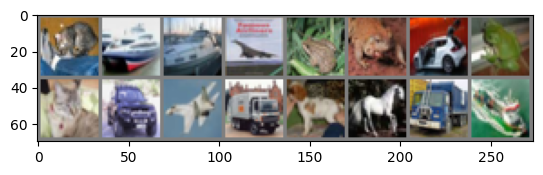

GroundTruth:  cat   ship  ship  plane
Predicted:  horse horse plane ship 


In [30]:
dataiter = iter(testloader)
images, labels = next(dataiter)

# 이미지를 출력합니다.
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))

# 에측값
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}' for j in range(4)))

In [32]:
correct = 0
total = 0
# 학습 중이 아니므로, 출력에 대한 변화도를 계산할 필요가 없습니다
with torch.no_grad():
    for data in testloader:
        images, labels = data
        # 신경망에 이미지를 통과시켜 출력을 계산합니다
        outputs = net(images)
        # 가장 높은 값(energy)를 갖는 분류(class)를 정답으로 선택하겠습니다
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: { 100 * correct / total} %')

Accuracy of the network on the 10000 test images: 60.19 %


In [24]:
# 각 분류(class)에 대한 예측값 계산을 위해 준비
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# 변화도는 여전히 필요하지 않습니다
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predictions = torch.max(outputs, 1)
        # 각 분류별로 올바른 예측 수를 모읍니다
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


# 각 분류별 정확도(accuracy)를 출력합니다
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

Accuracy for class: plane is 57.4 %
Accuracy for class: car   is 74.1 %
Accuracy for class: bird  is 42.8 %
Accuracy for class: cat   is 46.4 %
Accuracy for class: deer  is 53.3 %
Accuracy for class: dog   is 47.2 %
Accuracy for class: frog  is 64.5 %
Accuracy for class: horse is 67.6 %
Accuracy for class: ship  is 72.4 %
Accuracy for class: truck is 76.2 %


In [25]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

# CUDA 기기가 존재한다면, 아래 코드가 CUDA 장치를 출력합니다:

print(device)

cpu


In [26]:
net.to(device) # 모델을 GPU로 이동

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [27]:
inputs, labels = data[0].to(device), data[1].to(device)